In [44]:
'''
In this exercise, you will implement the K-means algorithms and use it
for image compression.
you wil use the K-means algorithm for image compression by reducing the  
number  of  colors  that  occur  in  an  image  to  only  those  
that  are  most common in that image.
'''

'''
K-means Clustering
'''

import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt

Data = scio.loadmat('data_sets/ex7data2.mat')
x_train = Data['X']
print('x_train.shape:', x_train.shape)

x_train.shape: (300, 2)


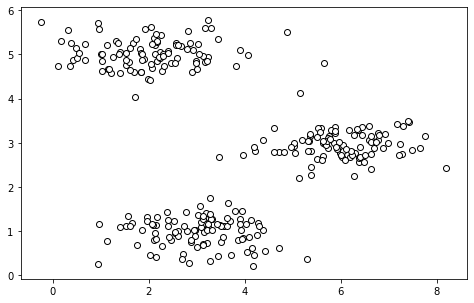

In [45]:
plt.figure(figsize = (8, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], marker = 'o', color = 'white', edgecolor = 'black')
plt.show()

In [46]:
def find_closest_centroids(x, centroid):
    '''
    This function takes the data matrix X and the locations of  
    all centroids inside centroids and should output a one-dimensional  
    array idx that holds the index (a  value  in{1,...,K},  
    where K is total number of centroids) of the closest centroid to 
    every training example.
    '''
    m = x.shape[0]
    k = centroid.shape[0]
    idx = np.zeros(m, dtype = 'int')
    distance = np.full(k, np.inf)
    for i in range(m):
        distance = np.sum(np.power(x[i] - centroid, 2), axis = 1)
        idx[i] = np.argmin(distance) + 1
    return idx

# Initialization
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
index = find_closest_centroids(x_train, initial_centroids)
print(index[0:3])

[1 3 2]


In [47]:
def compute_centroids(x, idx, K):
    mu = np.zeros((K, x.shape[1]))
    for i in range(1, K + 1):
        mu[i - 1] = x[idx == i].mean(axis = 0)
    return mu

mu = compute_centroids(x_train, index, K)
print(mu)

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


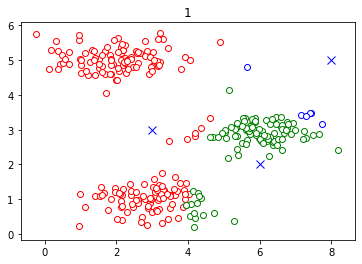

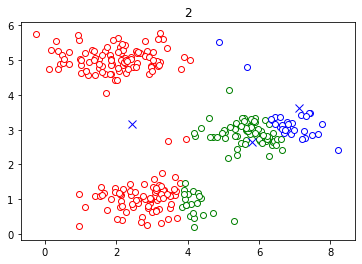

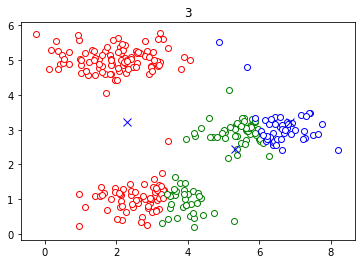

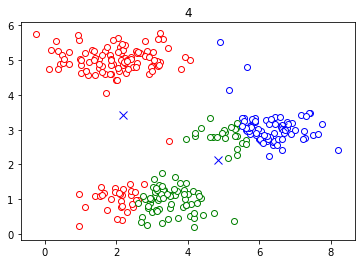

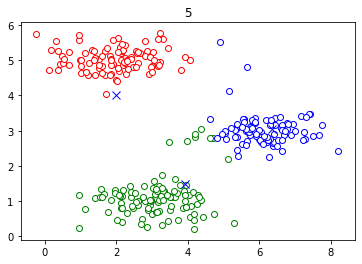

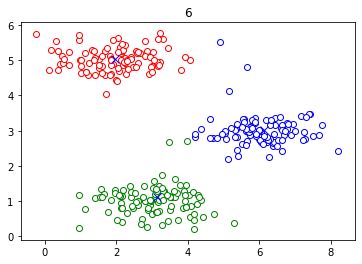

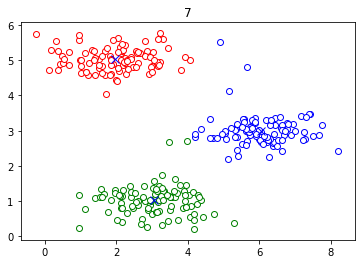

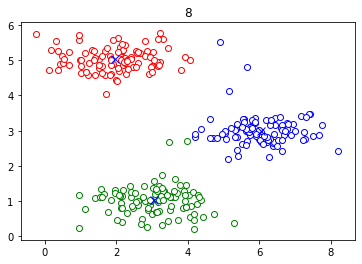

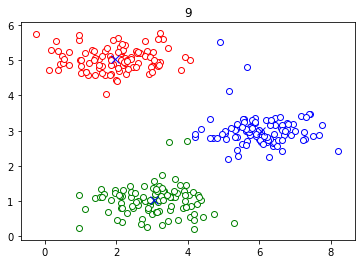

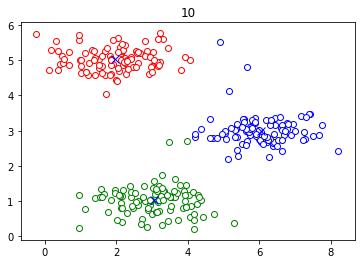

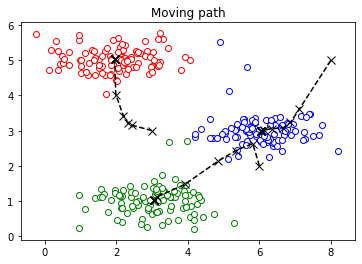

In [48]:
'''
K-means on example dataset
'''
max_iters = 10

def plot_process(x, mu, idx):
    color_ = ['r', 'g', 'b']
    for i in range(1, len(mu) + 1):
        plt.scatter(x[idx == i][:, 0], x[idx == i][:, 1], marker = 'o',
                   color = 'white', edgecolors = color_[i-1])
    plt.plot(mu[:, 0], mu[:, 1], 'bx', markersize = 8)

def run_kmeans(x, K, centroids, iterations, flag):
    if flag == True:
        store_centroids = np.reshape(centroids, (1, centroids.size)) 
    for iter in range(iterations):
        idx = find_closest_centroids(x, centroids)
        
        if flag == True:            
            plt.figure(iter)
            plot_process(x, centroids, idx)
            plt.title(iter + 1)
        
        centroids = compute_centroids(x, idx, K)

        if flag == True: 
            store_centroids = np.r_[store_centroids, np.reshape(centroids, (1, centroids.size))]
    
    # plot the final path that centroids went through
    if flag == True: 
        plt.figure(iterations)
        plot_process(x, centroids, idx)
        for j in range(0, centroids.size, 2):
            plt.plot(store_centroids[:, j], store_centroids[:, j + 1], 'kx--', markersize = 8)
        plt.title('Moving path')
    
    return centroids, idx

centroids, idx = run_kmeans(x_train, K, initial_centroids, max_iters, True)

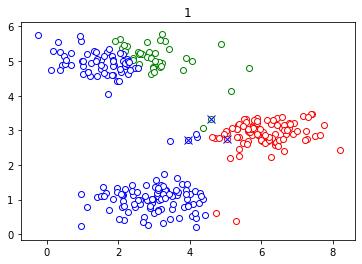

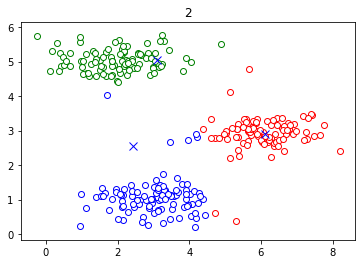

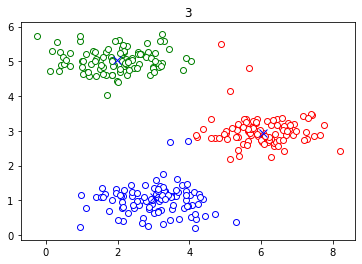

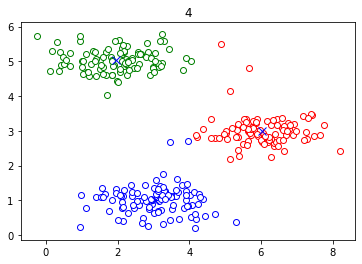

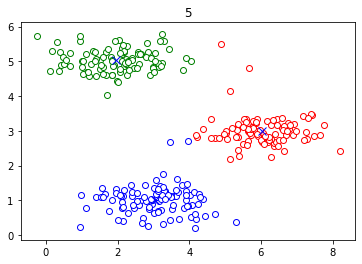

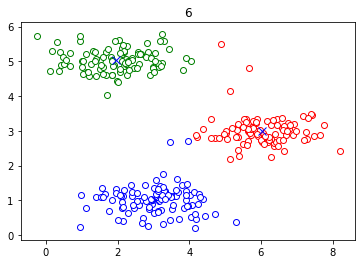

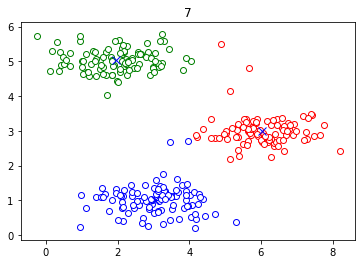

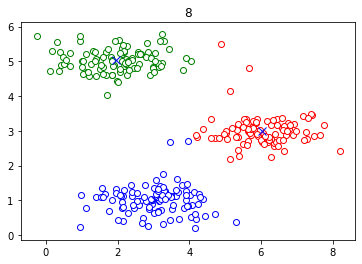

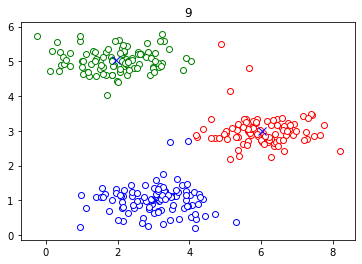

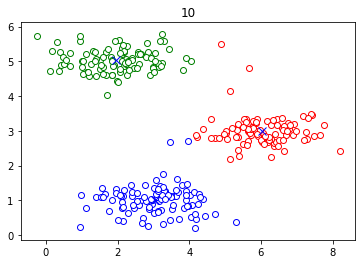

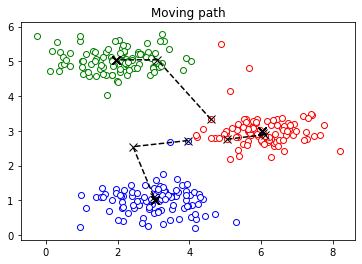

In [49]:
'''
Random initialization
'''
def kmeans_init_centroids(x, K):
    randidx = np.random.choice(x.shape[0], K) # randomly choose the training index
    centroids = x[randidx]
    return centroids

centroids = kmeans_init_centroids(x_train, K)
centroids, idx = run_kmeans(x_train, K, centroids, max_iters, True)

[0.85882354 0.7058824  0.40392157]


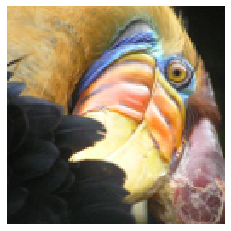

In [50]:
'''
Image compression with K-means
Our image contains thousands of colors, and in this part
of the exercise, you will reduce the number of colors to 16 colors.
'''
import matplotlib.image as mpimg

A = mpimg.imread('data_sets/bird_small.png')
print(A[0][0])

plt.imshow(A)
plt.axis('off')
plt.show()

In [51]:
x_pixel = A.reshape(-1, 3)
K = 16
max_iters = 10
centroids = kmeans_init_centroids(x_pixel, K)
centroids, idx = run_kmeans(x_pixel, K, centroids, max_iters, False)
print(centroids.shape)

(16, 3)


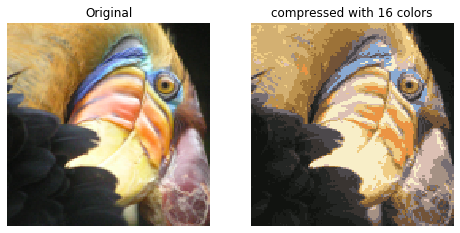

In [52]:
'''
reconstruct the image based only on the centroids assignments
'''
img_reconstruct = np.zeros(x_pixel.shape)

for i in range(1, len(centroids) + 1):
    img_reconstruct[idx == i] = centroids[i - 1]

img_reconstruct = img_reconstruct.reshape(A.shape)

fig, axes = plt.subplots(1, 2, figsize = (8, 5))

axes[0].axis('off')
axes[0].set_title('Original')
axes[0].imshow(A)

axes[1].axis('off')
axes[1].set_title('compressed with %d colors'%K)
axes[1].imshow(img_reconstruct)
